In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


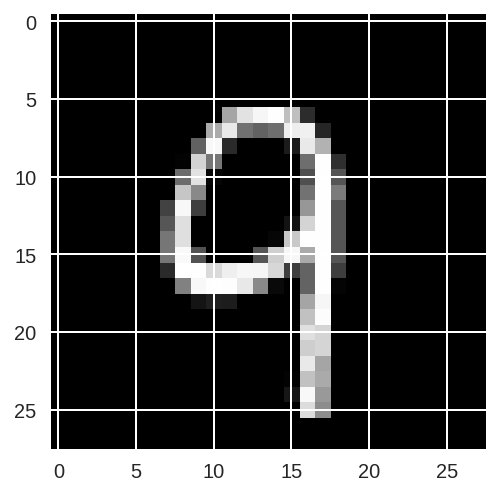

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [0]:
from torch import nn

In [0]:
class network(nn.Module):
  
  def __init__(self):
    super().__init__()
    
    self.hidden1=nn.Linear(784,128)
    self.hidden2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)
    self.relu=nn.ReLU()
    self.somx=nn.Softmax(dim=1)
  
  def forward(self,x):
    
    x=self.hidden1(x)
    x=self.relu(x)
    x=self.hidden2(x)
    x=self.relu(x)
    x=self.output(x)
    x=self.somx(x)
    
    return x  

In [8]:
model=network()
model

network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (somx): Softmax()
)

In [9]:
print(model.hidden1.weight)

Parameter containing:
tensor([[-0.0205, -0.0047,  0.0057,  ...,  0.0315, -0.0120,  0.0063],
        [-0.0133, -0.0001, -0.0077,  ...,  0.0081, -0.0243,  0.0317],
        [ 0.0248, -0.0312,  0.0088,  ...,  0.0102, -0.0356,  0.0010],
        ...,
        [-0.0040,  0.0031,  0.0317,  ...,  0.0227, -0.0116,  0.0089],
        [ 0.0172,  0.0264,  0.0024,  ..., -0.0121, -0.0286,  0.0133],
        [ 0.0053,  0.0035, -0.0257,  ..., -0.0211,  0.0217,  0.0027]],
       requires_grad=True)


In [10]:
print(model.hidden1.bias)


Parameter containing:
tensor([ 0.0048, -0.0259,  0.0223,  0.0116,  0.0281, -0.0073, -0.0263, -0.0035,
         0.0172,  0.0237, -0.0036, -0.0028, -0.0215,  0.0104,  0.0061,  0.0078,
         0.0113, -0.0130, -0.0018,  0.0040,  0.0111,  0.0093, -0.0138,  0.0218,
         0.0230, -0.0241, -0.0019, -0.0141, -0.0178,  0.0248, -0.0214, -0.0236,
         0.0090,  0.0030,  0.0028, -0.0220,  0.0355,  0.0186,  0.0293, -0.0032,
        -0.0087,  0.0232, -0.0083,  0.0050,  0.0237, -0.0143, -0.0330, -0.0334,
        -0.0335, -0.0162, -0.0212, -0.0323, -0.0086, -0.0102, -0.0249,  0.0310,
        -0.0236, -0.0020, -0.0222,  0.0046, -0.0103, -0.0254,  0.0266,  0.0203,
         0.0165, -0.0337,  0.0038,  0.0049,  0.0195, -0.0215, -0.0261, -0.0243,
         0.0244,  0.0038, -0.0044,  0.0031,  0.0348, -0.0311, -0.0172,  0.0068,
        -0.0254, -0.0291, -0.0036, -0.0006, -0.0000,  0.0267,  0.0192, -0.0272,
        -0.0164,  0.0293,  0.0300, -0.0108, -0.0136, -0.0253, -0.0188, -0.0146,
         0.0191, -

In [11]:
model.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [12]:
model.hidden1.weight.data.normal_(std=0.01)


tensor([[ 0.0012, -0.0078, -0.0041,  ...,  0.0171,  0.0009, -0.0065],
        [ 0.0017,  0.0064, -0.0115,  ...,  0.0081,  0.0020,  0.0065],
        [ 0.0174,  0.0119, -0.0027,  ..., -0.0020, -0.0131, -0.0056],
        ...,
        [ 0.0026, -0.0018, -0.0038,  ...,  0.0035, -0.0031, -0.0078],
        [ 0.0140, -0.0015,  0.0147,  ...,  0.0058, -0.0094,  0.0038],
        [-0.0119, -0.0053,  0.0148,  ...,  0.0019, -0.0078, -0.0059]])

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [0]:
images.resize_(64, 1, 784)
img_idx = 0
ps = model.forward(images[img_idx,:])

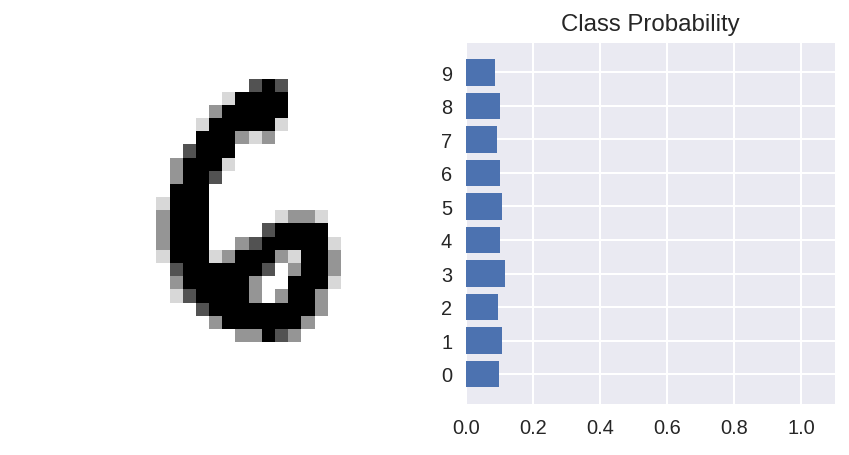

In [16]:
img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)